In [1]:
from datetime import date, datetime, timedelta
import yfinance as yfin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader
from pandas_datareader.fred import FredReader
import rnd_stuff.tr_approx as approx
import matplotlib as mpl

In [23]:
mpl.rcParams['figure.figsize'] = [18.0, 10.0]

In [24]:
# https://fred.stlouisfed.org/series/MEDCPIM157SFRBCLE
# Median Consumer Price Index (MEDCPIM157SFRBCLE) 

# Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity (DGS10) 
# Market Yield on U.S. Treasury Securities at 30-Year Constant Maturity (DGS30) 
df = FredReader(
    ['DGS10',
     'DGS30'
    ],
    start=datetime.today() - timedelta(days=365*100)
).read()
df = df.reindex(pd.date_range(df.index[0], df.index[-1])).ffill().dropna()
df

,DGS10,DGS30
1977-02-15,7.36,7.70
1977-02-16,7.34,7.67
1977-02-17,7.26,7.67
1977-02-18,7.41,7.76
1977-02-19,7.41,7.76
...,...,...
2021-10-16,1.59,2.05
2021-10-17,1.59,2.05
2021-10-18,1.59,2.01
2021-10-19,1.65,2.09


In [25]:
df_rates = df / 100
df_rates

,DGS10,DGS30
1977-02-15,0.0736,0.0770
1977-02-16,0.0734,0.0767
1977-02-17,0.0726,0.0767
1977-02-18,0.0741,0.0776
1977-02-19,0.0741,0.0776
...,...,...
2021-10-16,0.0159,0.0205
2021-10-17,0.0159,0.0205
2021-10-18,0.0159,0.0201
2021-10-19,0.0165,0.0209


<AxesSubplot:>

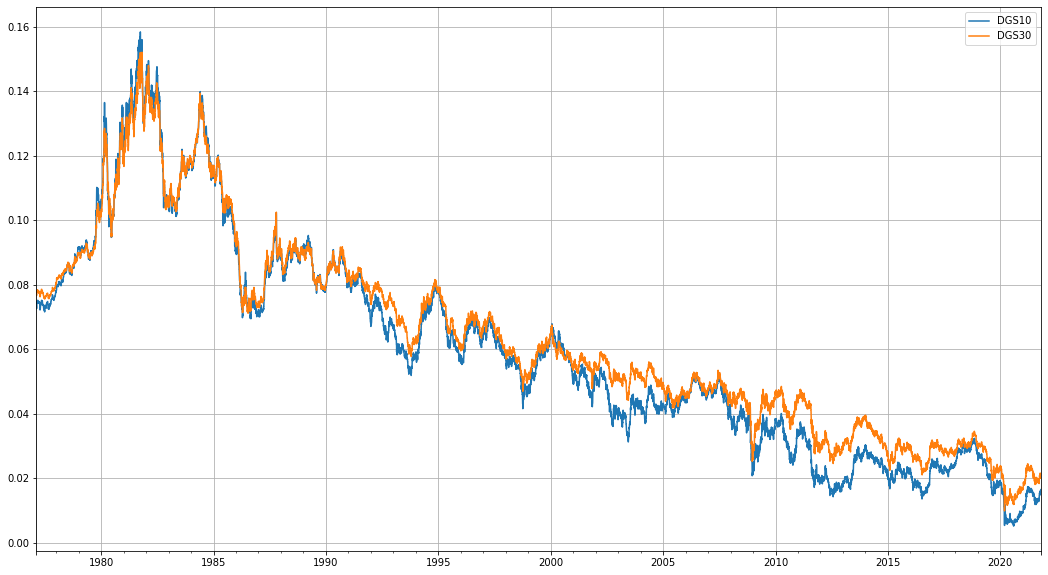

In [26]:
df_rates.plot(grid=True)

In [61]:
tr = pd.DataFrame()

In [63]:
tr['ust10'] = approx.tr(df_rates['DGS10'], 10.0)
tr['ust30'] = approx.tr(df_rates['DGS30'], 30.0)
tr

,ust10,ust30
1977-02-15,NaN,NaN
1977-02-16,0.001681,0.003804
1977-02-17,0.005913,0.000292
1977-02-18,-0.010122,-0.010033
1977-02-19,0.000283,0.000295
...,...,...
2021-10-17,0.000062,0.000080
2021-10-18,0.000062,0.009104
2021-10-19,-0.005432,-0.017499
2021-10-20,0.000065,-0.006526


In [64]:
cum_tr = (tr+1).cumprod()
cum_tr

,ust10,ust30
1977-02-15,NaN,NaN
1977-02-16,1.001681,1.003804
1977-02-17,1.007603,1.004098
1977-02-18,0.997405,0.994023
1977-02-19,0.997686,0.994317
...,...,...
2021-10-17,72.383640,208.958143
2021-10-18,72.388154,210.860441
2021-10-19,71.994952,207.170568
2021-10-20,71.999609,205.818614


<AxesSubplot:>

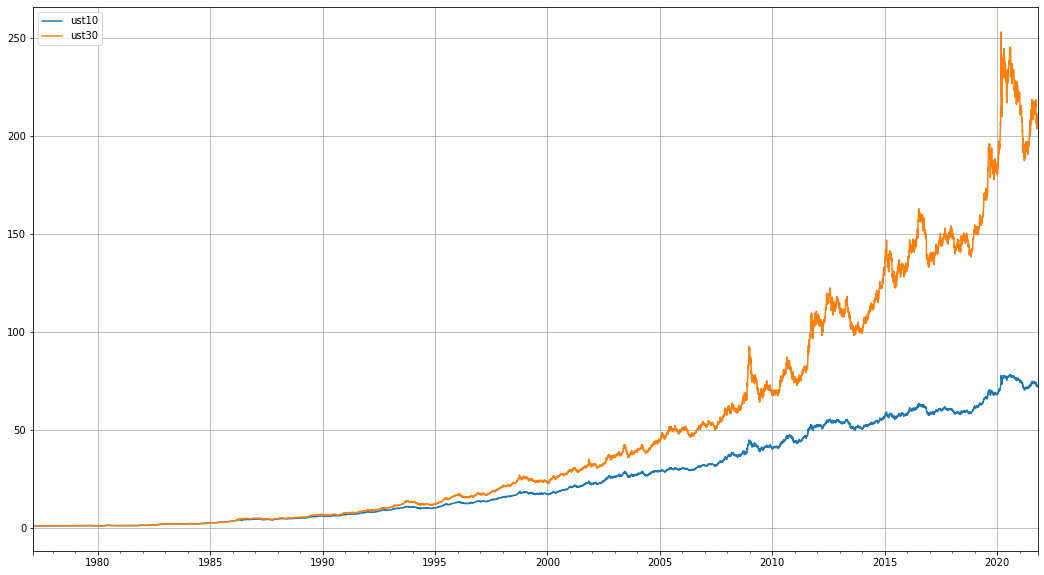

In [65]:
cum_tr.plot(grid=True)

In [10]:
prices = pd.DataFrame()

In [11]:
prices['vglt'] = yfin.Ticker('VGLT').history(period='max')['Close']
prices

,vglt
Date,
2010-01-04,41.276154
2010-01-05,41.621563
2010-01-06,41.297760
2010-01-07,41.196999
2010-01-08,41.125034
...,...
2021-10-18,88.250000
2021-10-19,87.139999
2021-10-20,86.589996


In [12]:
prices['schr'] = yfin.Ticker('SCHR').history(period='max')['Close']
prices

,vglt,schr
Date,,
2010-01-04,41.276154,NaN
2010-01-05,41.621563,NaN
2010-01-06,41.297760,NaN
2010-01-07,41.196999,NaN
2010-01-08,41.125034,NaN
...,...,...
2021-10-18,88.250000,56.259998
2021-10-19,87.139999,56.209999
2021-10-20,86.589996,56.220001


In [13]:
prices['govt'] = yfin.Ticker('govt').history(period='max')['Close']
prices

,vglt,schr,govt
Date,,,
2010-01-04,41.276154,NaN,NaN
2010-01-05,41.621563,NaN,NaN
2010-01-06,41.297760,NaN,NaN
2010-01-07,41.196999,NaN,NaN
2010-01-08,41.125034,NaN,NaN
...,...,...,...
2021-10-18,88.250000,56.259998,26.440001
2021-10-19,87.139999,56.209999,26.360001
2021-10-20,86.589996,56.220001,26.320000


In [36]:
prices = prices.reindex(pd.date_range(prices.index[0], prices.index[-1]))
prices = prices.ffill()

<AxesSubplot:>

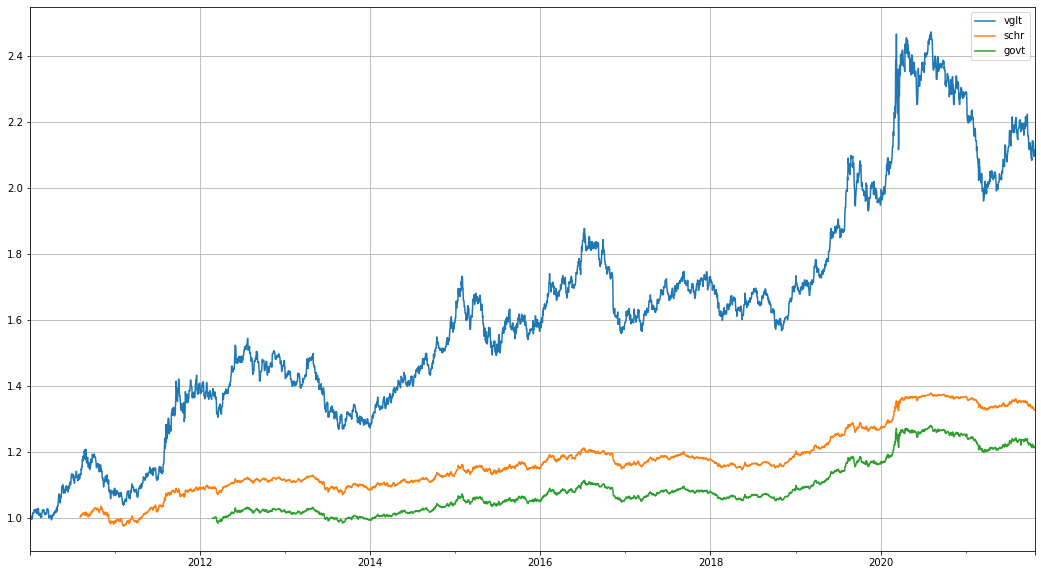

In [37]:
(prices/prices.shift(1, freq='D')).cumprod().plot(grid=True)

In [113]:
sp_ust10plus = pd.read_csv(
    "../data/sp500-ust-10plus.csv",
    index_col=0,
    parse_dates=True,
    sep=';',
    skiprows=6,
    skipfooter=4,
    engine='python',
    error_bad_lines=False,
)
sp_ust10plus = sp_ust10plus.reindex(tr.index).ffill().dropna()
sp_ust10plus

,S&P U.S. Treasury Bond 10+ Year Index
2011-09-30,671.71
2011-10-01,671.71
2011-10-02,671.71
2011-10-03,687.93
2011-10-04,680.79
...,...
2021-10-17,1048.31
2021-10-18,1052.13
2021-10-19,1039.01
2021-10-20,1032.44


In [117]:
u10 = sp_ust10plus['S&P U.S. Treasury Bond 10+ Year Index']
returns = pd.DataFrame()
returns = returns.join(tr + 1, how='right')
returns['sp-ust10+'] = u10 / u10.shift(1, freq='D')
returns = returns.join(prices/prices.shift(1, freq='D'))
returns = returns.dropna()
returns

,ust10,ust30,sp-ust10+,vglt,schr,govt
2012-02-25,1.000077,1.000121,1.000000,1.000000,1.000000,1.000000
2012-02-26,1.000077,1.000121,1.000000,1.000000,1.000000,1.000000
2012-02-27,1.005524,1.011958,1.008378,1.009540,1.002812,1.000000
2012-02-28,0.998267,0.994287,0.998050,0.994870,0.999813,1.000000
2012-02-29,0.996471,0.998173,0.994242,0.998340,0.997382,1.000000
...,...,...,...,...,...,...
2021-10-16,1.000062,1.000080,1.000000,1.000000,1.000000,1.000000
2021-10-17,1.000062,1.000080,1.000000,1.000000,1.000000,1.000000
2021-10-18,1.000062,1.009104,1.003644,1.003297,0.998226,1.000000
2021-10-19,0.994568,0.982501,0.987530,0.987422,0.999111,0.996974


<AxesSubplot:>

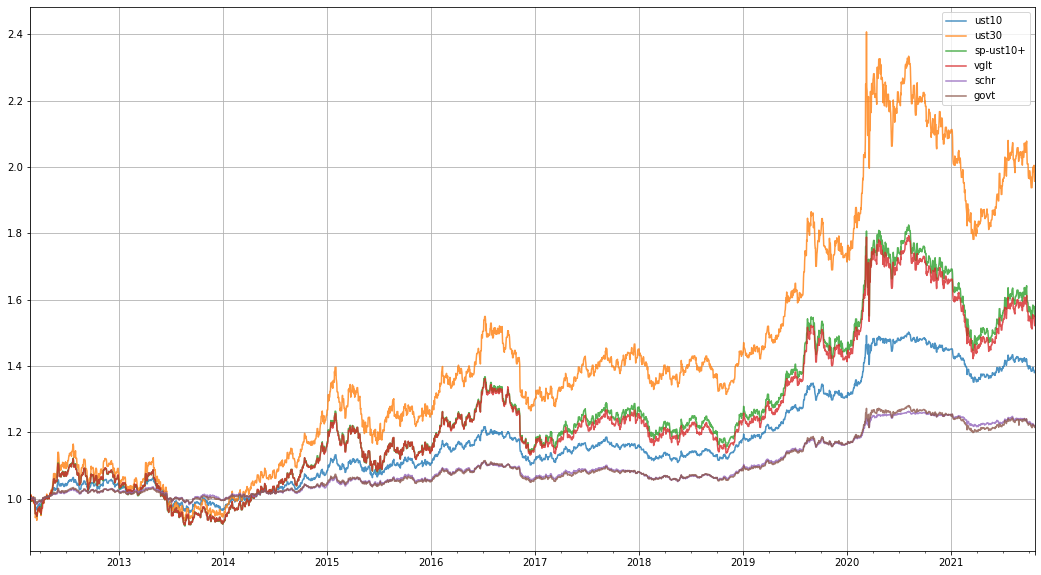

In [118]:
returns.cumprod().plot(grid=True, alpha=0.8)